In [1]:
import matplotlib as plt
import numpy as np
import nltk
from nltk import CFG


NLP Assignment 3 - Nitzan Cohen & Gal Astrach

In [2]:

sg = """
S -> NP VP
DET -> 'the' | 'a' | 'A' | 'The' | 'Some'
VP -> IV | TV NP | GV NP NP
Noun ->   'boy' | 'boys' | 'book'
MNoun -> 'butter' | 'bread'
ADJ -> 'heavy'
PROPN -> 'John' | 'Mary' 
PRON -> 'They' | 'it' | 'she' | 'Everybody' | 'her' | 'them' | 'She'
NP -> MNoun |  DET Noun | DET ADJ Noun |  Noun | PRON  | PROPN 
IV -> 'left' 
GV -> 'gave'
TV -> 'eats' | 'loves' | 'love' |
"""
g = CFG.fromstring(sg)

# Bottom-up  parser
sr_parser = nltk.ShiftReduceParser(g, trace=2)

# Parse sentences and observe the behavior of the parser
def parse_sentence(sent):
    tokens = sent.split()
    trees = sr_parser.parse(tokens)
    for tree in trees:
        print(tree)

parse_sentence("John left")
parse_sentence("John eats bread")

Parsing 'John left'
    [ * John left]
  S [ 'John' * left]
  R [ PROPN * left]
  R [ NP * left]
  S [ NP 'left' * ]
  R [ NP IV * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP (PROPN John)) (VP (IV left)))
Parsing 'John eats bread'
    [ * John eats bread]
  S [ 'John' * eats bread]
  R [ PROPN * eats bread]
  R [ NP * eats bread]
  S [ NP 'eats' * bread]
  R [ NP TV * bread]
  S [ NP TV 'bread' * ]
  R [ NP TV MNoun * ]
  R [ NP TV NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP (PROPN John)) (VP (TV eats) (NP (MNoun bread))))


    John loves Mary
    They love Mary
    They love her
    She loves them
    Everybody loves John
    A boy loves Mary
	The boy loves Mary
	Some boys love Mary
    John gave Mary a heavy book
    John gave it to Mary
	John likes butter
	John moves a chair

In [3]:
parse_sentence('John loves Mary')
parse_sentence('They love Mary')
parse_sentence('They love her')
parse_sentence('She loves them')
parse_sentence('Everybody loves John')
parse_sentence('A boy loves Mary')
parse_sentence('The boy loves Mary')
parse_sentence('Some boys love Mary')
parse_sentence('John gave Mary a heavy book')
# parse_sentence('John gave it to Mary')
# parse_sentence('John likes butter')
# parse_sentence('John moves a chair')

Parsing 'John loves Mary'
    [ * John loves Mary]
  S [ 'John' * loves Mary]
  R [ PROPN * loves Mary]
  R [ NP * loves Mary]
  S [ NP 'loves' * Mary]
  R [ NP TV * Mary]
  S [ NP TV 'Mary' * ]
  R [ NP TV PROPN * ]
  R [ NP TV NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP (PROPN John)) (VP (TV loves) (NP (PROPN Mary))))
Parsing 'They love Mary'
    [ * They love Mary]
  S [ 'They' * love Mary]
  R [ PRON * love Mary]
  R [ NP * love Mary]
  S [ NP 'love' * Mary]
  R [ NP TV * Mary]
  S [ NP TV 'Mary' * ]
  R [ NP TV PROPN * ]
  R [ NP TV NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP (PRON They)) (VP (TV love) (NP (PROPN Mary))))
Parsing 'They love her'
    [ * They love her]
  S [ 'They' * love her]
  R [ PRON * love her]
  R [ NP * love her]
  S [ NP 'love' * her]
  R [ NP TV * her]
  S [ NP TV 'her' * ]
  R [ NP TV PRON * ]
  R [ NP TV NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP (PRON They)) (VP (TV love) (NP (PRON her))))
Parsing 'She loves them'
    [ * She loves them]
  S [ 'She' * loves 

In [4]:
from nltk import PCFG
from nltk.grammar import Nonterminal
from collections import defaultdict
from nltk.probability import DictionaryProbDist
from nltk import Tree

def generate_Tree(symbol,total_dicts):
    if type(symbol) != Nonterminal:
        return symbol
    else:
        children = total_dicts[symbol].generate()
        return Tree(symbol,[generate_Tree(expander,total_dicts) for expander in children])
    
def generate_dists(grammar):
    """@Pre: grammer is PCFG obj"""
    productions = grammar.productions()
    total_dicts = {}
    collect_productions = defaultdict(lambda : {})
    for production in productions:
        collect_productions[production.lhs()][production.rhs()] = production.prob()
    for lhs,rhs in collect_productions.items():
        total_dicts[lhs] = DictionaryProbDist(collect_productions[lhs])
    return total_dicts

def pcfg_generate(grammar):
    """@Pre: grammar is PCFG.fromstring"""
    return generate_Tree(Nonterminal('S'),generate_dists(grammar))
    
#(S (NP I) (VP (V saw)))

toy_gram = """
    S -> NP VP [1.0]
    NP -> Det N [0.5] | NP PP [0.25] | 'John' [0.1] | 'I' [0.15]
    Det -> 'the' [0.8] | 'my' [0.2]
    N -> 'man' [0.5] | 'telescope' [0.5]
    VP -> VP PP [0.1] | V NP [0.7] | V [0.2]
    V -> 'ate' [0.35] | 'saw' [0.65]
    PP -> P NP [1.0]
    P -> 'with' [0.61] | 'under' [0.39]
"""

for i in range(1,5):
    print("----------")
    pcfg_gram = PCFG.fromstring(toy_gram)
    print(pcfg_generate(pcfg_gram))
    print("----------")
print('---')

----------
(S
  (NP (Det the) (N telescope))
  (VP (V saw) (NP (Det the) (N telescope))))
----------
----------
(S (NP I) (VP (V saw) (NP John)))
----------
----------
(S
  (NP (Det the) (N telescope))
  (VP (VP (V saw)) (PP (P with) (NP (Det the) (N man)))))
----------
----------
(S (NP (Det my) (N telescope)) (VP (V saw)))
----------
---


Validation

In [5]:
from nltk import  MLEProbDist,FreqDist,Production
import math
from collections import defaultdict

def calculate_freq_dists(productions):
    total_dists = defaultdict(dict)
    for prod in productions:
        total_dists[prod.lhs()][prod] = total_dists[prod.lhs()].get(prod, 0) + 1
    return [FreqDist(val) for key,val in total_dists.items()]
    
def search_unpack(Q, prod):
    for prob_prod in Q.productions():
        if prob_prod.lhs() == prod.lhs() and prob_prod.rhs() == prod.rhs():
            return prob_prod.prob()
    return 0


def kl_div_spec(P,Q):
    summary = []
    eps = 0.0001
    SP = set(tuple(P.freqdist().keys()))
    if len(SP) == 0: return 1
    p_lhs = list(P.freqdist().keys())[0]
    prob_prods_q = filter(lambda x : x.lhs() == p_lhs.lhs(),Q.productions())
    SQ = set(tuple(map(lambda x : Production(x.lhs(),x.rhs()),prob_prods_q)))
    SU = set()
    SU = SU.union(SP,SQ)
    
    pc = eps*len(SU.difference(SP))/len(SP)
    qc = eps*len(SU.difference(SQ))/len(SQ)
    
    
    for prod,counts in P.freqdist().items():
        p = P.prob(prod) - pc if prod in SP else eps
        q = search_unpack(Q, prod) - qc if prod in SQ else eps 
        summary.append((p * math.log((p/q))))
    return sum(summary)

file_name = 'toy_pcfg2.gen'
toy2 = nltk.grammar.toy_pcfg2
prods = []
with open(file_name, 'w') as the_file:
    for i in range(1,1000):
        tree = pcfg_generate(toy2)
        tree_str = tree.__str__()
        prods += Tree.fromstring(tree_str).productions()
        the_file.write(tree_str)
        the_file.write('\n')
        
freq_dists = calculate_freq_dists(prods)
MLE_probs = [MLEProbDist(dist) for dist in freq_dists]
print([kl_div_spec(p,toy2) for p in MLE_probs])

[0.0, 0.0005022154373820736, 8.425704397979194e-05, 0.0011801037254316649, 0.001537980438048838, 8.240690538049988e-05, 0.0009926693649000761, 0.0, 0.0001280883417822407]


We can see that the KL-Divergence is almost 0 in all of the distributions,
therefore we can infer that the distribution for each non-terminal was sampled according to
distribution of the PCFG given.


Question 2.2: Learn a PCFG from a Treebank

2.2.1

In [6]:

from nltk.corpus import LazyCorpusLoader, BracketParseCorpusReader

def simplify_functional_tag(tag):
    if '-' in tag:
        tag = tag.split('-')[0]
    return tag

treebank = LazyCorpusLoader('treebank/combined', BracketParseCorpusReader, r'wsj_.*\.mrg')

# Raw form
# print(treebank.parsed_sents()[:1])

# Pretty print
print(treebank.parsed_sents()[3])

print(" ".join(treebank.parsed_sents()[3].leaves()))


(S
  (S-TPC-1
    (NP-SBJ
      (NP (NP (DT A) (NN form)) (PP (IN of) (NP (NN asbestos))))
      (RRC
        (ADVP-TMP (RB once))
        (VP
          (VBN used)
          (NP (-NONE- *))
          (S-CLR
            (NP-SBJ (-NONE- *))
            (VP
              (TO to)
              (VP
                (VB make)
                (NP (NNP Kent) (NN cigarette) (NNS filters))))))))
    (VP
      (VBZ has)
      (VP
        (VBN caused)
        (NP
          (NP (DT a) (JJ high) (NN percentage))
          (PP (IN of) (NP (NN cancer) (NNS deaths)))
          (PP-LOC
            (IN among)
            (NP
              (NP (DT a) (NN group))
              (PP
                (IN of)
                (NP
                  (NP (NNS workers))
                  (RRC
                    (VP
                      (VBN exposed)
                      (NP (-NONE- *))
                      (PP-CLR (TO to) (NP (PRP it)))
                      (ADVP-TMP
                        (NP
                 

In [7]:
# we need to transform the tree to remove NONE tags and simplify tags.

from nltk.grammar import Production
from nltk import Tree, Nonterminal


def get_tag(tree,interior_nodes):
    if isinstance(tree, Tree):
        interior_nodes["interior_nodes"] = interior_nodes.get("interior_nodes") + 1 
        return Nonterminal(simplify_functional_tag(tree.label()))
    else:
        return tree

def tree_to_production(tree,interior_nodes):
    return Production(get_tag(tree,interior_nodes), [get_tag(child,interior_nodes) for child in tree])

none_pred = lambda x: x.label() == '-NONE-'

def do_not_exist_NONE(tree):
    for child in tree:
        if isinstance(child,Tree) and none_pred(child):
            return False
    return True

def tree_to_productions(tree, interior_nodes={"interior_nodes": 0}):
    if do_not_exist_NONE(tree):      
        yield tree_to_production(tree, interior_nodes)
        for child in tree:
            if isinstance(child, Tree):
                for prod in tree_to_productions(child, interior_nodes):
                    yield prod
                

In [8]:
trial = Tree.fromstring("""
        (VP
          (VBN used)
          (NP (-NONE- *)))
""")
# print(trial)
# 
# f = tree_to_productions(trial)
# 
# for prod in f:
#     print(prod)
#     print("\n")

In [9]:

def induce_prod_dists(treebank,n):
    prods_counter = 0
    prod_dists = defaultdict(int)
    interior_nodes = {"interior_nodes": 0}
    
    for tree in treebank.parsed_sents()[:n]:
        gen = tree_to_productions(tree,interior_nodes)
        for prod in gen:
            prod_dists[prod] = prod_dists.get(prod,0) + 1
            prods_counter+=1
    
    print("Number of interior nodes {}".format(interior_nodes))
    print("Number of prods {}".format(prods_counter))
    return prod_dists

def pcfg_learn(treebank,n):
    interior_nodes = {"interior_nodes": 0}
    prods = []
    for tree in treebank.parsed_sents()[:n]:
        gen = tree_to_productions(tree,interior_nodes)
        for prod in gen:
            prods.append(prod)
    
    print("Number of interior nodes {}".format(interior_nodes))
    print("Number of prods {}".format(len(prods)))
    return induce_pcfg(Nonterminal("S"),prods)

Number of interior nodes {'interior_nodes': 14966}
Number of prods 7438
Number of interior nodes {'interior_nodes': 28769}
Number of prods 14311


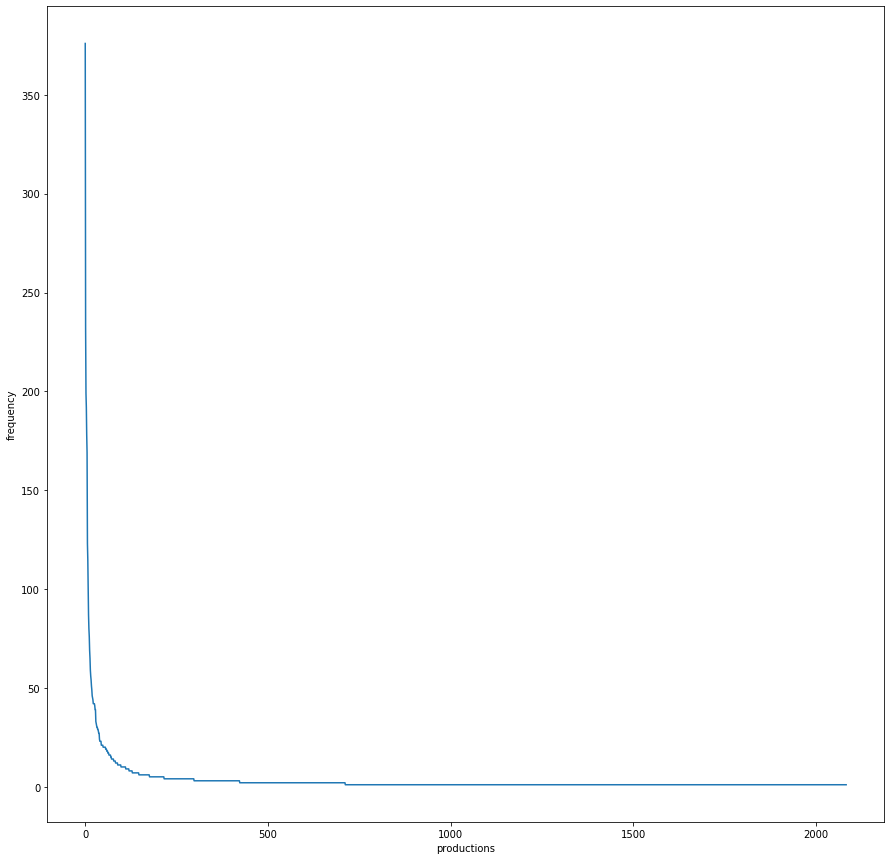

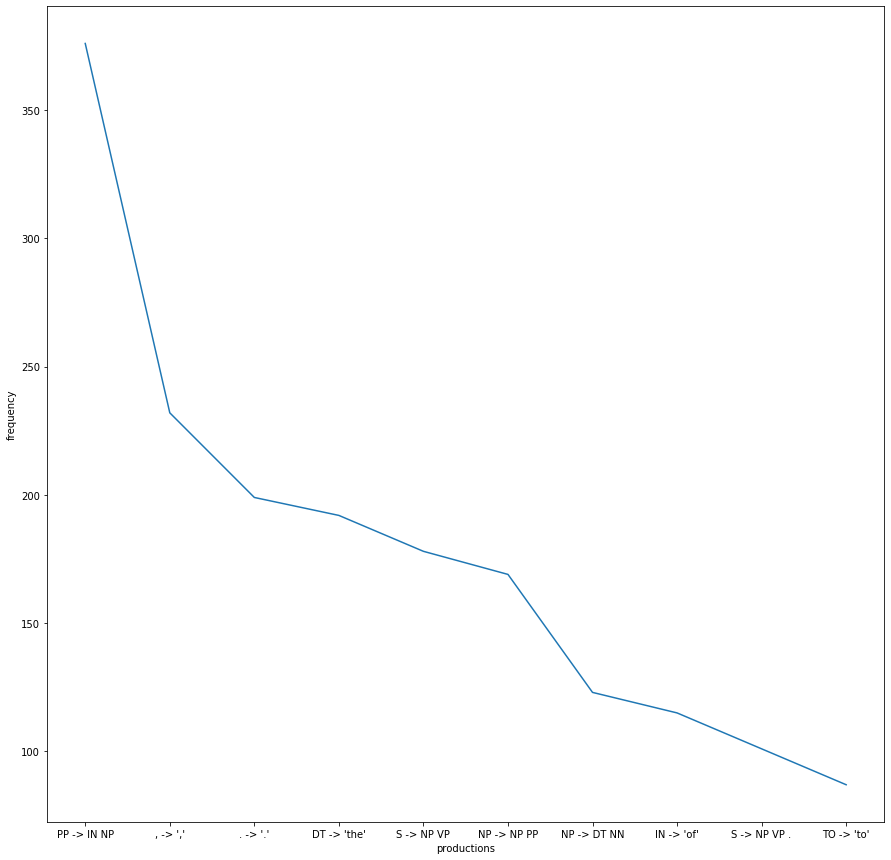

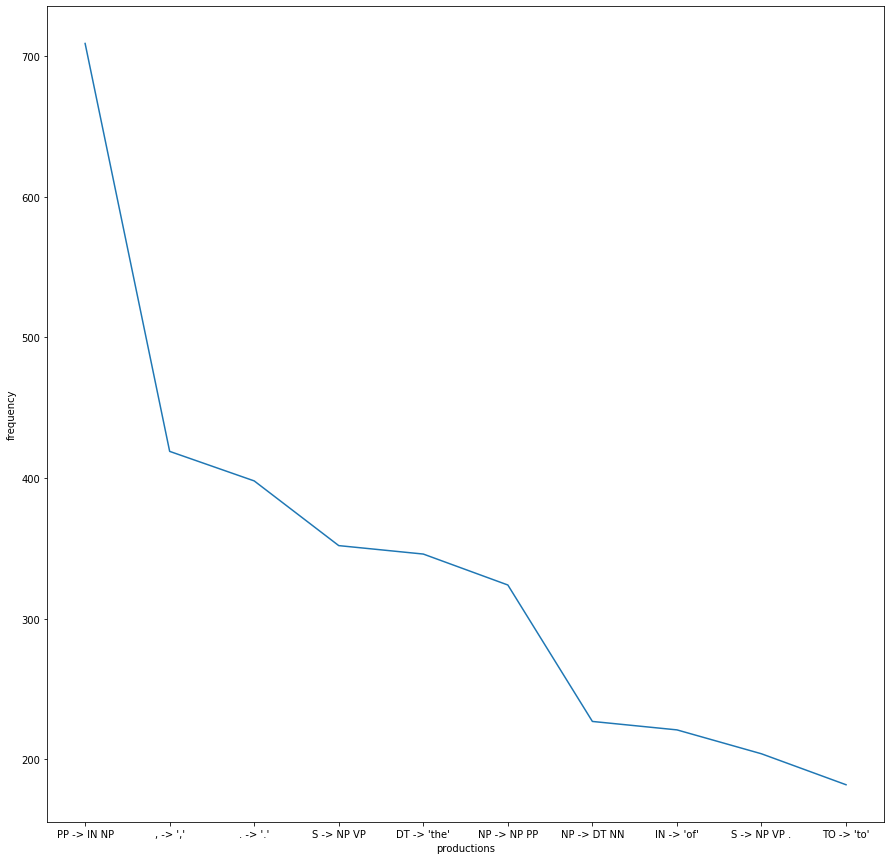

In [10]:
def sort_dict(dic, pred=lambda x : x[1], reverse=True):
    return dict(sorted(dic.items(),key=pred,reverse=reverse))





prod_dists_200 = induce_prod_dists(treebank, 200)
prod_dists_200 = sort_dict(prod_dists_200)

prod_dists_400 = induce_prod_dists(treebank, 400)
prod_dists_400 = sort_dict(prod_dists_400)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
# label_size = 4
# plt.rcParams['xtick.labelsize'] = label_size 
plt.plot(range(len(prod_dists_200)),list(prod_dists_200.values()))
# plt.plot([freq for freq in prod_dists.values()],[str(prod) for prod in prod_dists.keys()])
plt.ylabel('frequency')
plt.xlabel('productions')
# plt.xticks(range(len(prod_dists)),list(prod_dists.keys()))
plt.show()


max_items = 10
plt.plot(range(max_items),list(prod_dists_200.values())[:max_items])
# plt.plot([freq for freq in prod_dists.values()],[str(prod) for prod in prod_dists.keys()])
plt.ylabel('frequency')
plt.xlabel('productions')
plt.xticks(range(max_items),list(prod_dists_200.keys()))
plt.show()


plt.plot(range(max_items),list(prod_dists_400.values())[:max_items])
# plt.plot([freq for freq in prod_dists.values()],[str(prod) for prod in prod_dists.keys()])
plt.ylabel('frequency')
plt.xlabel('productions')
plt.xticks(range(max_items),list(prod_dists_400.keys()))
plt.show()



In [11]:
from nltk import induce_pcfg

two_hundered = induce_pcfg(Nonterminal('S'),list(prod_dists_200.keys()))

four_hundered = induce_pcfg(Nonterminal('S'),list(prod_dists_400.keys()))

The rules are quite similar according to the graphs of the top10 most frequent rules in the data.

##Question 2.3 

In [12]:
from nltk import treetransforms
# 
# def convert2cnf(trees):
#     for tr in trees:
#         treetransforms.chomsky_normal_form(tr)


def induce_prod_dists_cnf(treebank,n):
    prods_counter=0
    prod_dists = defaultdict(int)
    interior_nodes = {"interior_nodes": 0}
    for tree in treebank.parsed_sents()[:n]:
        treetransforms.chomsky_normal_form(tree)
        gen = tree_to_productions(tree, interior_nodes)
        for prod in gen:
            prod_dists[prod] = prod_dists.get(prod,0) + 1
            prods_counter+=1
    print("Number of interior nodes {}".format(interior_nodes))
    print("Number of prods {}".format(prods_counter))
    return prod_dists


def pcfg_cnf_learn(treebank,n,wildcard=False):
    prods = []
    interior_nodes = {"interior_nodes": 0}
    for tree in treebank.parsed_sents()[:n]:
        treetransforms.chomsky_normal_form(tree)
        gen = tree_to_productions(tree, interior_nodes)
        for prod in gen:
            prods.append(prod)
    print("Number of interior nodes {}".format(interior_nodes))
    print("Number of prods {}".format(len(prods)))
    if wildcard:
        prods.append(Production("?",[Production("?")]))
    return induce_pcfg(Nonterminal("S"),prods)

In [13]:
sentence = Tree.fromstring("""(TOP
  (S
    (S
      (VP
        (VBN Turned)
        (ADVP (RB loose))
        (PP
          (IN in)
          (NP
            (NP (NNP Shane) (NNP Longman) (POS 's))
            (NN trading)
            (NN room)))))
    (, ,)
    (NP (DT the) (NN yuppie) (NNS dealers))
    (VP (AUX do) (NP (NP (RB little)) (ADJP (RB right))))
    (. .)))""")

print(sentence)
print(list(tree_to_productions(sentence)))
print('$')
treetransforms.chomsky_normal_form(sentence)
print(sentence)
print(list(tree_to_productions(sentence)))



(TOP
  (S
    (S
      (VP
        (VBN Turned)
        (ADVP (RB loose))
        (PP
          (IN in)
          (NP
            (NP (NNP Shane) (NNP Longman) (POS 's))
            (NN trading)
            (NN room)))))
    (, ,)
    (NP (DT the) (NN yuppie) (NNS dealers))
    (VP (AUX do) (NP (NP (RB little)) (ADJP (RB right))))
    (. .)))
[TOP -> S, S -> S , NP VP ., S -> VP, VP -> VBN ADVP PP, VBN -> 'Turned', ADVP -> RB, RB -> 'loose', PP -> IN NP, IN -> 'in', NP -> NP NN NN, NP -> NNP NNP POS, NNP -> 'Shane', NNP -> 'Longman', POS -> "'s", NN -> 'trading', NN -> 'room', , -> ',', NP -> DT NN NNS, DT -> 'the', NN -> 'yuppie', NNS -> 'dealers', VP -> AUX NP, AUX -> 'do', NP -> NP ADJP, NP -> RB, RB -> 'little', ADJP -> RB, RB -> 'right', . -> '.']
$
(TOP
  (S
    (S
      (VP
        (VBN Turned)
        (VP|<ADVP-PP>
          (ADVP (RB loose))
          (PP
            (IN in)
            (NP
              (NP (NNP Shane) (NP|<NNP-POS> (NNP Longman) (POS 's)))
              (NP|

In [14]:
pcfg_cnf = induce_prod_dists_cnf(treebank, -1)
pcfg_all = induce_prod_dists(treebank,-1)
print('Ratio of productions is: ',176751/146803, '(cnf/not-cnf)')

Number of interior nodes {'interior_nodes': 355304}
Number of prods 176751
Number of interior nodes {'interior_nodes': 295408}
Number of prods 146803
Ratio of productions is:  1.20400128062778 (cnf/not-cnf)


##Question 2.4
We can conclude that the CNF form has more productions -> more interior nodes,
because the CNF restricts us to a specific form of rules.
e.g if we have a rule NP -> PROPN in order to convert it to the CNF form 
we need to add 1 more rule to describe that derivation, therefore,
CNF trees are much more wider (more rules and Non-terminals).

In [15]:
def calc_prods(treebank,n):
    def get_tag(tree,interior_nodes):
        if isinstance(tree, Tree):
            interior_nodes["interior_nodes"] = interior_nodes.get("interior_nodes") + 1 
            return Nonterminal(simplify_functional_tag(tree.label()))
        else:
            return tree

    def tree_to_production(tree,interior_nodes,father):
        return Production(get_tag(tree,interior_nodes), [get_tag(child,interior_nodes) for child in tree]), father
    
    none_pred = lambda x: x.label() == '-NONE-'
    
    def do_not_exist_NONE(tree):
        for child in tree:
            if isinstance(child,Tree) and none_pred(child):
                return False
        return True
    
    def tree_to_productions(tree, interior_nodes={"interior_nodes": 0}, father="The almighty"):
        if do_not_exist_NONE(tree):      
            yield tree_to_production(tree, interior_nodes,father)
            for child in tree:
                if isinstance(child, Tree):
                    for prod in tree_to_productions(child, interior_nodes,tree.label()):
                        yield prod
                    
    prods_counter = 0
    prod_dists = defaultdict(int)
    interior_nodes = {"interior_nodes": 0}
    
    for tree in treebank.parsed_sents()[:n]:
        gen = tree_to_productions(tree,interior_nodes)
        for prod,father in gen:
            prod_dists[(prod,father)] = prod_dists.get((prod,father),0) + 1
            prods_counter+=1
    
    print("Number of interior nodes {}".format(interior_nodes))
    print("Number of prods {}".format(prods_counter))
    return prod_dists


prod_dists = calc_prods(treebank,-1)

def plot_dists(count,highest=10):
    labels, values = zip(*count.items())
    
    labels = labels[:highest]
    values = values[:highest]
    indexes = np.arange(len(labels))
    width = 1
    
    plt.figure()
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.show()


pred1 = lambda x,y: str(x.lhs()) == "NP"
pred2 = lambda x,y: str(x.lhs()) == "NP" and y == "S"
pred3 = lambda x,y: str(x.lhs()) == "NP" and y == "VP"


def compute_rhs(prod_dists,pred, highest=10):
    count = {}
    for (prod,father), val in prod_dists.items():
        if pred(prod,father):
            if prod in count:
                count[prod] += val
            else:
                count[prod] = val
    count = sort_dict(count)
    print(list(count.items())[:20])
    plot_dists(count)
    return count
    

Number of interior nodes {'interior_nodes': 295408}
Number of prods 146803


[(NP -> NP PP, 3193), (NP -> DT NN, 2549), (NP -> PRP, 1350), (NP -> NNS, 1201), (NP -> NN, 1200), (NP -> NNP NNP, 1178), (NP -> NNP, 1132), (NP -> DT JJ NN, 802), (NP -> JJ NNS, 694), (NP -> NP SBAR, 518), (NP -> DT NNS, 490), (NP -> JJ NN, 435), (NP -> NN NNS, 385), (NP -> CD, 355), (NP -> NP CC NP, 348), (NP -> NP , NP, 343), (NP -> DT NN NN, 334), (NP -> NNP NNP NNP, 325), (NP -> CD NN, 309), (NP -> NP , NP ,, 302)]
[(NP -> PRP, 973), (NP -> NP PP, 547), (NP -> DT NN, 500), (NP -> NNP NNP, 373), (NP -> NNS, 268), (NP -> NNP, 249), (NP -> NP , NP ,, 178), (NP -> DT NNS, 156), (NP -> NN NNS, 108), (NP -> JJ NNS, 99), (NP -> NN, 98), (NP -> DT JJ NN, 90), (NP -> DT NNP, 89), (NP -> NP SBAR, 73), (NP -> NP , SBAR ,, 65), (NP -> DT, 64), (NP -> EX, 62), (NP -> NP CC NP, 60), (NP -> DT NN NN, 48), (NP -> NNP NNP NNP, 47)]
[(NP -> NP PP, 932), (NP -> DT NN, 291), (NP -> NN, 201), (NP -> NP SBAR, 193), (NP -> PRP, 129), (NP -> NNS, 126), (NP -> DT JJ NN, 119), (NP -> JJ NNS, 100), (NP -> J

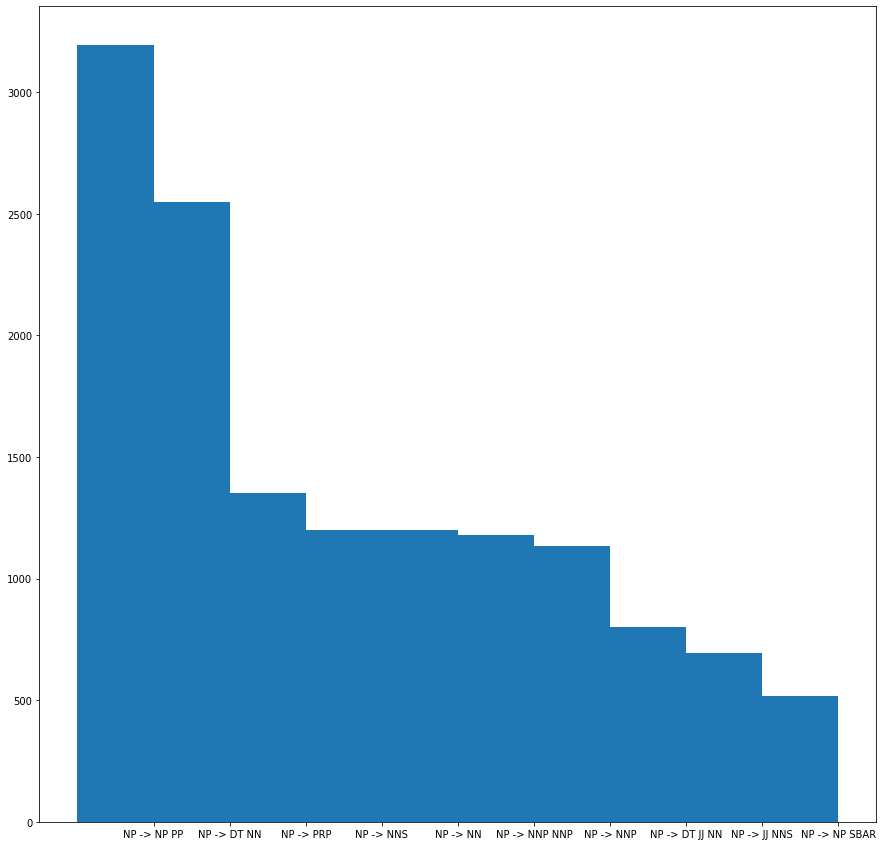

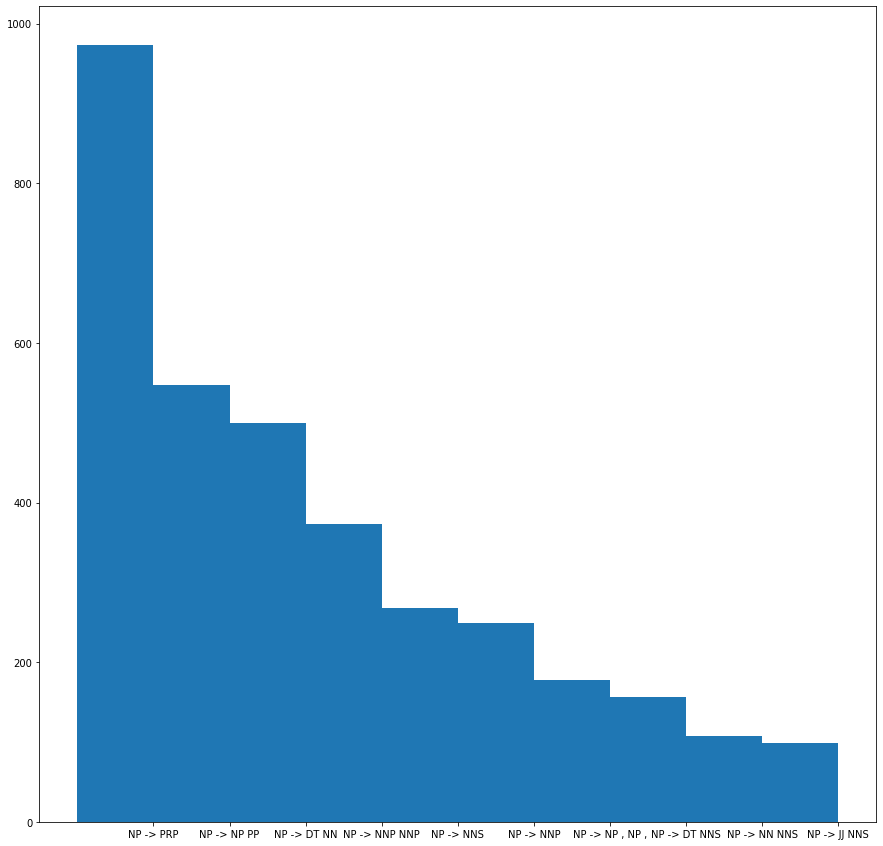

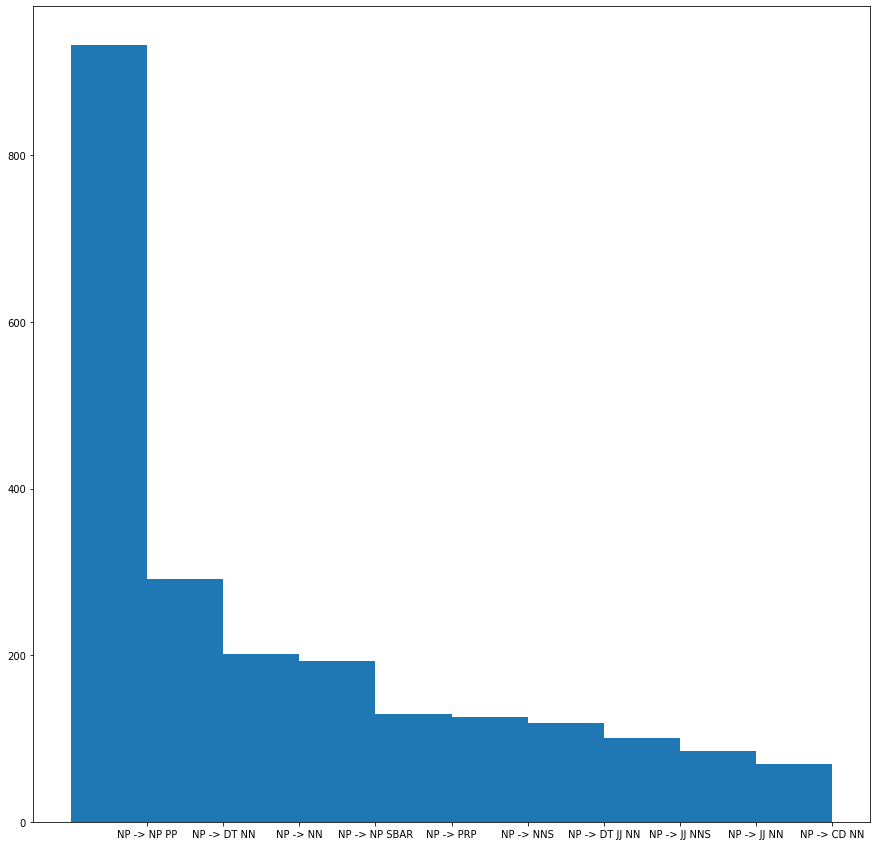

In [16]:
no_father = compute_rhs(prod_dists,pred1)
s_father = compute_rhs(prod_dists,pred2)
vp_father = compute_rhs(prod_dists,pred3)


In [17]:
def kl_div(P,Q):
    """Pre: P,Q are MLEProbDist objects"""
    summary = []
    eps = 0.0001
    SP = set(tuple(P.freqdist().keys()))
    if len(SP) == 0: return 1
    SQ = set(tuple(Q.freqdist().keys()))
    SU = SP.union(SQ)
    
    pc = eps*len(SU.difference(SP))/len(SP)
    qc = eps*len(SU.difference(SQ))/len(SQ)
    
    
    for prod,counts in P.freqdist().items():
        p = P.prob(prod) - pc if prod in SP and P.prob(prod) - pc >= 0 else eps
        q = Q.prob(prod) - qc if prod in SQ and Q.prob(prod) - qc > 0 else eps 
        summary.append((p * math.log((p/q))))
    return sum(summary)


no_father_dist = MLEProbDist(FreqDist(no_father))
s_father_dist = MLEProbDist(FreqDist(s_father))
vp_father_dist = MLEProbDist(FreqDist(vp_father))

print(kl_div(no_father_dist,s_father_dist))
print(kl_div(no_father_dist,vp_father_dist))
print(kl_div(s_father_dist,vp_father_dist))

0.3528262019383069
0.3090660067402654
0.746169802473304


We can infer from the kl-divergence and the graphs that the CFG hypothesis assumption doesn't hold,
Which means the distributions are pretty different (kl-divergence between s_father&vp_father is high).
and therefore, the node expansion is dependent on it's location on the tree.

Question 3:

In [18]:
tree_to_test = treebank.parsed_sents()[3]
print(tree_to_test)



def reformat_tags(tree):
    q = []
    q.append(tree)
    while q:
        node = q.pop(0)
        if isinstance(node,Tree):
            node._label = simplify_functional_tag(node.label())
            for child in node:
                q.append(child)
        

def filter_none(tree):
    if not isinstance(tree, Tree):
        return
    for i,child in enumerate(tree):
        if isinstance(child,Tree) and child.label() == '-NONE-':
            tree.remove(tree[i])
        else:
            filter_none(child)

filter_none(tree_to_test)
reformat_tags(tree_to_test)
print("-------------------")
print(tree_to_test)

(S
  (S-TPC-1
    (NP-SBJ
      (NP (NP (DT A) (NN form)) (PP (IN of) (NP (NN asbestos))))
      (RRC
        (ADVP-TMP (RB once))
        (VP
          (VBN used)
          (NP (-NONE- *))
          (S-CLR
            (NP-SBJ (-NONE- *))
            (VP
              (TO to)
              (VP
                (VB make)
                (NP (NNP Kent) (NN cigarette) (NNS filters))))))))
    (VP
      (VBZ has)
      (VP
        (VBN caused)
        (NP
          (NP (DT a) (JJ high) (NN percentage))
          (PP (IN of) (NP (NN cancer) (NNS deaths)))
          (PP-LOC
            (IN among)
            (NP
              (NP (DT a) (NN group))
              (PP
                (IN of)
                (NP
                  (NP (NNS workers))
                  (RRC
                    (VP
                      (VBN exposed)
                      (NP (-NONE- *))
                      (PP-CLR (TO to) (NP (PRP it)))
                      (ADVP-TMP
                        (NP
                 

In [19]:
import random
from nltk import ViterbiParser

data = list(treebank.parsed_sents())
random.shuffle(data)
index = math.floor(len(data)*0.8)
train_data = data[:index]
test_data = data[index:]

train_cnf_pcfg = pcfg_cnf_learn(treebank,index)
    
cnf_parser = ViterbiParser(train_cnf_pcfg)

Number of interior nodes {'interior_nodes': 287605}
Number of prods 143072


In [22]:
def generate_constituents(parsed_tree,parsed_sentence):
    for tree in parsed_tree:
        for subtree in tree.subtrees():
            sen = subtree.leaves()
            label = subtree.label() if isinstance(subtree,Tree) else subtree
            if sen:
                start = parsed_sentence.index(sen[0])
                end = parsed_sentence.index(sen[-1])
            yield label, start, end
        
def gen_const_real_tree(tree):
    parsed_sentence = tree.leaves()
    for subtree in tree.subtrees():
        sen = subtree.leaves()
        label = subtree.label() if isinstance(subtree,Tree) else subtree
        if sen:
            start = parsed_sentence.index(sen[0])
            end = parsed_sentence.index(sen[-1])
        yield label, start, end


In [26]:
for tree in treebank.parsed_sents()[index:]:
    treetransforms.chomsky_normal_form(tree)
    try:
        a = train_cnf_pcfg.check_coverage(tree.leaves())
    except Exception as e:
        continue
    reformat_tags(tree)
    
    print("Parsing sentence: {}".format(tree.leaves()))
    parsed_tree = cnf_parser.parse(tree.leaves())
    precision = 0
    recall = 0
    tree_gen = gen_const_real_tree(tree)
    parsed_tree_gen = generate_constituents(parsed_tree,tree.leaves())
    real_cons = list(tree_gen)
    pred_cons = list(parsed_tree_gen)
    for const in parsed_tree_gen:
        if const in real_cons:
            precision +=1
    precision = precision/len(pred_cons)
    for const in tree_gen:
        if const in pred_cons:
            recall +=1
    recall = recall / len(real_cons)
    
    
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
        

    break
    # print(list(parsed_tree))

Parsing sentence: ['Meanwhile', ',', 'most', 'investment-grade', 'bonds', 'ended', 'unchanged', 'to', 'as', 'much', 'as', '1\\/8', 'point', 'higher', '.']


KeyboardInterrupt: 